In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys1 = ct.ss([[-1, 1], [-10, -1]], np.zeros(2), np.eye(2), 0) # A1 
sys2 = ct.ss([[-1, 10], [-1, -1]], np.zeros(2), np.eye(2), 0) # A2

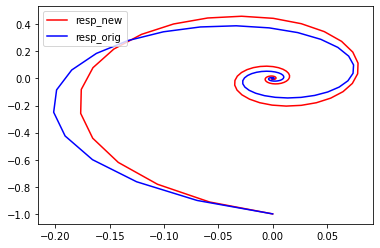

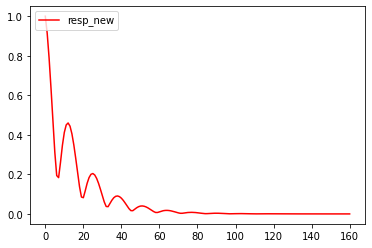

In [3]:
sys_new = ct.ss([[-1, 1], [-15, -1]], np.zeros(2), np.eye(2), 0)
resp1 = ct.initial_response(sys_new, 10, [0, -1])
t = []
resp1_mag = []
for i in range(len(resp1.states[0])):
    t.append(i)
    resp1_mag.append(np.linalg.norm(np.array([resp1.states[0,i], resp1.states[1,i]])))
    
plt.plot(resp1.states[0], resp1.states[1], "-r", label="resp_new")

resp2 = ct.initial_response(sys1, 10, [0, -1])
plt.plot(resp2.states[0], resp2.states[1], "-b", label="resp_orig")
plt.legend(loc="upper left")

fig2, ax2 = plt.subplots()
ax2.plot(t, resp1_mag, 'r',label="resp_new")
plt.legend(loc="upper left")


# plt.axis('equal')

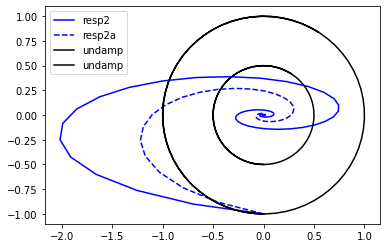

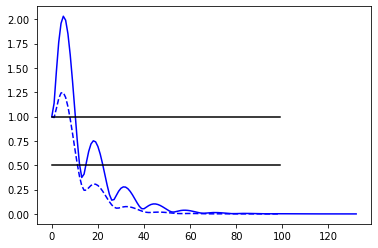

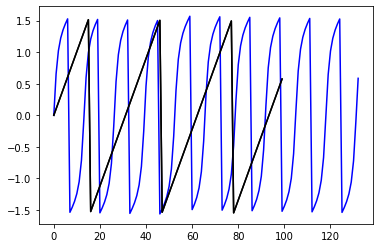

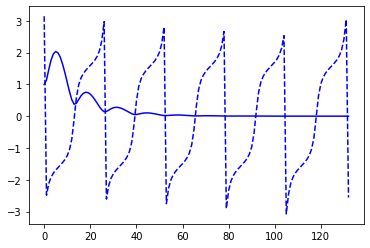

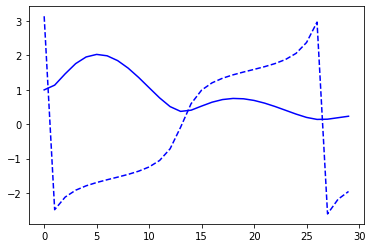

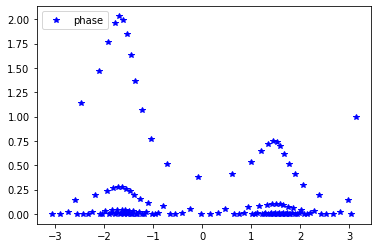

In [4]:
# Plot magnitude:
sys2 = ct.ss([[-1, 10], [-1, -1]], np.zeros(2), np.eye(2), 0) # A2
sys2a = ct.ss([[-1, 5], [-1, -1]], np.zeros(2), np.eye(2), 0) # A2

sys4 =  ct.ss([[0, 1], [-1, 0]], np.zeros(2), np.eye(2), 0) # A4

resp2 = ct.initial_response(sys2, 10, [0, -1])
resp2a = ct.initial_response(sys2a, 10, [0, -1])
resp4 = ct.initial_response(sys4, 10, [0, -1])
resp5 = ct.initial_response(sys4, 10, [0, -0.5])

plt.plot(resp2.states[0], resp2.states[1], "-b", label="resp2")
plt.plot(resp2a.states[0], resp2a.states[1], "--b", label="resp2a")

plt.plot(resp5.states[0], resp5.states[1], "-k", label="undamp")
plt.plot(resp4.states[0], resp4.states[1], "-k", label="undamp")

plt.legend(loc="upper left")

t = []
ta = []
t4 = []
t5 = []
resp2_mag = []
resp2a_mag = []
resp4_mag = []
resp5_mag = []

resp2_phase = []
resp2_phase_atan = []
resp2a_phase = []
resp4_phase = []
resp5_phase = []
for i in range(len(resp2.states[0])):
    t.append(i)
    resp2_mag.append(np.linalg.norm(np.array([resp2.states[0,i], resp2.states[1,i]])))
    resp2_phase.append(np.arctan(resp2.states[0,i]/resp2.states[1,i]))
    resp2_phase_atan.append(np.arctan2(resp2.states[0,i], resp2.states[1,i]))


for i in range(len(resp2a.states[0])):
    ta.append(i)
    resp2a_mag.append(np.linalg.norm(np.array([resp2a.states[0,i], resp2a.states[1,i]])))
    resp2a_phase.append(np.arctan(resp2a.states[0,i]/resp2a.states[1,i]))



for i in range(len(resp2a.states[0])):
    t4.append(i)
    t5.append(i)
    resp4_mag.append(np.linalg.norm(np.array([resp4.states[0,i], resp4.states[1,i]])))
    resp5_mag.append(np.linalg.norm(np.array([resp5.states[0,i], resp5.states[1,i]])))
    resp4_phase.append(np.arctan(resp4.states[0,i]/resp4.states[1,i]))
    resp5_phase.append(np.arctan(resp5.states[0,i]/resp5.states[1,i]))


fig2, ax2 = plt.subplots()
ax2.plot(t, resp2_mag, 'b',label="resp2")
ax2.plot(ta, resp2a_mag, 'b--',label="resp2a")
ax2.plot(t4, resp4_mag, 'k',label="resp4")
ax2.plot(t5, resp5_mag, 'k',label="resp5")

fig3, ax3 = plt.subplots()
ax3.plot(t, resp2_phase, 'b',label="resp2")
# ax3.plot(ta, resp2a_phase, 'b--',label="resp2a")
ax3.plot(t4, resp4_phase, 'k',label="resp4")
ax3.plot(t5, resp5_phase, 'k',label="resp5")


fig4, ax4 = plt.subplots()
ax4.plot(t, resp2_phase_atan, 'b--', label="phase")
ax4.plot(t, resp2_mag, 'b', label="mag")

fig5, ax5 = plt.subplots()
ax5.plot(t[0:30], resp2_phase_atan[0:30], 'b--', label="phase")
ax5.plot(t[0:30], resp2_mag[0:30], 'b', label="mag")

fig6, ax6 = plt.subplots()
ax6.plot(resp2_phase_atan, resp2_mag, '*b', label="phase")

plt.legend(loc="upper left")

(-2.167145879529595,
 1.1508164704537902,
 -2.1543853375580486,
 0.8828450890513152)

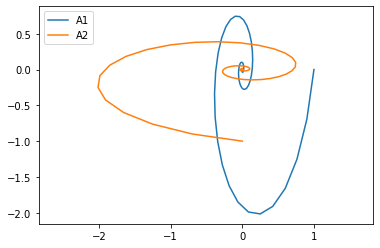

In [5]:
resp1 = ct.initial_response(sys1, 10, [1, 0])
plt.plot(resp1.states[0], resp1.states[1],label="A1")

resp2 = ct.initial_response(sys2, 10, [0, -1])
plt.plot(resp2.states[0], resp2.states[1],label="A2")
plt.legend(loc="upper left")


plt.axis('equal')

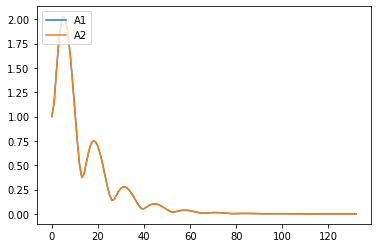

In [6]:
t = []
resp1_mag = []
resp2_mag = []
for i in range(len(resp1.states[0])):
    t.append(i)
    resp1_mag.append(np.linalg.norm(np.array([resp1.states[0,i], resp1.states[1,i]])))
    resp2_mag.append(np.linalg.norm(np.array([resp2.states[0,i], resp2.states[1,i]])))
    
fig2, ax2 = plt.subplots()
ax2.plot(t, resp1_mag, label="A1")
ax2.plot(t, resp2_mag, label="A2")
plt.legend(loc="upper left")

In [7]:
# Construct a composite system
def switched_update(t, x, u, p):
    if x[0] > 0 and x[1] < 0:
        return sys1.A @ x
    elif x[0] <= 0 and x[1] < 0:
        return sys2.A @ x
    elif x[0] > 0 and x[1] <= 0:
        return sys1.A @ x
    else:
        return sys2.A @ x
    
sys = ct.NonlinearIOSystem(switched_update, None, states=2, inputs=0, outputs=2)

[ 0.42781015 -0.43900047]


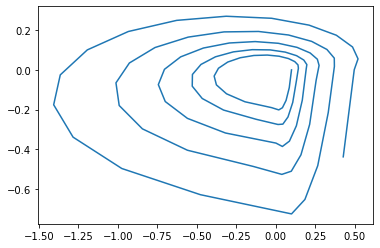

In [8]:
# Simulate
resp = ct.input_output_response(sys, np.linspace(0, 10, 100), 0, [0.1, 0])
plt.plot(resp.states[0], resp.states[1])
print(resp.states[:, -1])

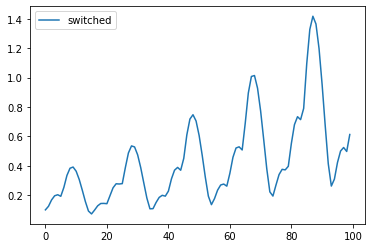

In [9]:
t = []
resp_mag = []
for i in range(len(resp.states[0])):
    t.append(i)
    resp_mag.append(np.linalg.norm(np.array([resp.states[0,i], resp.states[1,i]])))
    
fig3, ax3 = plt.subplots()
ax3.plot(t, resp_mag, label="switched")
plt.legend(loc="upper left")